# Empirical Project II
## Factors that influence smoking prevalence 
The title of the notebook should be coherent with file name. Homework, project,etc   

In [1]:
%%capture
# Capture suppresses output to screen
import stata_setup
stata_setup.config("/Applications/Stata 17", "be")

In [12]:
%%stata
/* Define paths for data and output */
global data "Data"
global output "Output"
global country "cameroon"


. /* Define paths for data and output */
. global data "Data"

. global output "Output"

. global country "cameroon"

. 


In [13]:
%%capture
%%stata
log using "$output/${country}Model.log", replace

In [14]:
%%stata
use "$data/${country}SmokingSurvery.dta", clear
describe


. use "$data/${country}SmokingSurvery.dta", clear

. describe

Contains data from Data/cameroonSmokingSurvery.dta
 Observations:         2,922                  
    Variables:            54                  5 Aug 2021 22:55
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
FinalWgt        double  %10.0g                FinalWgt
CR1             byte    %10.0g                CR1
CR2             byte    %10.0g                CR2
CMR3            byte    %10.0g                CMR3
CMR4            byte    %10.0g                CMR4
CR5             byte    %10.0g                CR5
CR6             byte    %10.0g                CR6
CR7             byte    %10.0g                CR7
CR8             byte    %10.0g                CR8
CR9             byte    %10.0g                CR9
CR10  

In [15]:
%%stata
/* Declare the data as survey data */
svyset PSU [pweight = FinalWgt], strata(Stratum)


. /* Declare the data as survey data */
. svyset PSU [pweight = FinalWgt], strata(Stratum)

Sampling weights: FinalWgt
             VCE: linearized
     Single unit: missing
        Strata 1: Stratum
 Sampling unit 1: PSU
           FPC 1: <zero>

. 


## Question: 
Does exposure to smoking impact the probability of youth smoking?

Factors that influence prevalence of youth smoking in Cameroon:
+ Age
+ Sex
+ Availability of spending money
+ Exposure to smokers
    + Home
    + Indoor events outside home
    + Outdoor events

In [16]:
%%stata
summarize smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
tab smoker
tab female


. summarize smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      smoker |      2,768    .0690029    .2535048          0          1
             |
 ageCategory |
<= 11 yrs..  |      2,920    .0417808    .2001222          0          1
 12 yrs old  |      2,920    .0825342    .2752241          0          1
 13 yrs old  |      2,920    .1839041    .3874723          0          1
 14 yrs old  |      2,920    .2469178    .4312924          0          1
-------------+---------------------------------------------------------
 15 yrs old  |      2,920    .2106164    .4078163          0          1
 16 yrs old  |      2,920    .1003425    .3005075          0          1
>= 17 yrs..  |      2,920    .1339041    .3406076          0          1
             |
      female |
       male  |      2,920    .5554

In [17]:
%%stata
svy: logit smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
outreg using ${output}/${country}Reg.doc, se replace    


. svy: logit smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors
(running logit on estimation sample)

Survey: Logistic regression

Number of strata = 12                              Number of obs   =     2,732
Number of PSUs   = 25                              Population size = 893,775.7
                                                   Design df       =        13
                                                   F(11, 3)        =     24.85
                                                   Prob > F        =    0.0114

------------------------------------------------------------------------------
             |             Linearized
      smoker | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 ageCategory |
 12 yrs old  |  -1.047842   .6435347    -1.63   0.127    -2.438114    .3424305
 13 yrs old  |  -1.209684   .4904289    -2.47   0.028 

In [18]:
%%stata
svy: probit smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
outreg using ${output}/${country}Reg.doc, se merge replace    


. svy: probit smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors
(running probit on estimation sample)

Survey: Probit regression

Number of strata = 12                              Number of obs   =     2,732
Number of PSUs   = 25                              Population size = 893,775.7
                                                   Design df       =        13
                                                   F(11, 3)        =     11.81
                                                   Prob > F        =    0.0330

------------------------------------------------------------------------------
             |             Linearized
      smoker | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 ageCategory |
 12 yrs old  |  -.5464086   .3407965    -1.60   0.133    -1.282655    .1898375
 13 yrs old  |  -.5894535   .2591951    -2.27   0.041 

In [19]:
%%stata
svy: logit smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
margins i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors, atmeans


. svy: logit smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors
(running logit on estimation sample)

Survey: Logistic regression

Number of strata = 12                              Number of obs   =     2,732
Number of PSUs   = 25                              Population size = 893,775.7
                                                   Design df       =        13
                                                   F(11, 3)        =     24.85
                                                   Prob > F        =    0.0114

------------------------------------------------------------------------------
             |             Linearized
      smoker | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 ageCategory |
 12 yrs old  |  -1.047842   .6435347    -1.63   0.127    -2.438114    .3424305
 13 yrs old  |  -1.209684   .4904289    -2.47   0.028 


. margins i.ageCategory, atmeans

Adjusted predictions

Number of strata = 12                              Number of obs   =     2,732
Number of PSUs   = 25                              Population size = 893,775.7
Model VCE: Linearized                              Design df       =        13

Expression: Pr(smoker), predict()
At: 0.ageCategory     = .0488621 (mean)
    1.ageCategory     =  .092817 (mean)
    2.ageCategory     = .1969519 (mean)
    3.ageCategory     = .2495654 (mean)
    4.ageCategory     = .2008894 (mean)
    5.ageCategory     = .0919747 (mean)
    6.ageCategory     = .1189396 (mean)
    0.female          = .5318133 (mean)
    1.female          = .4681867 (mean)
    0.hasMoney        = .2171834 (mean)
    1.hasMoney        = .7828166 (mean)
    0.smokingHome     = .7216331 (mean)
    1.smokingHome     = .2783669 (mean)
    0.smokingIndoors  = .5604884 (mean)
    1.smokingIndoors  = .4395116 (mean)
    0.smokingOutdoors = .5133391 (mean)
    1.smokingOutdoors = .486660

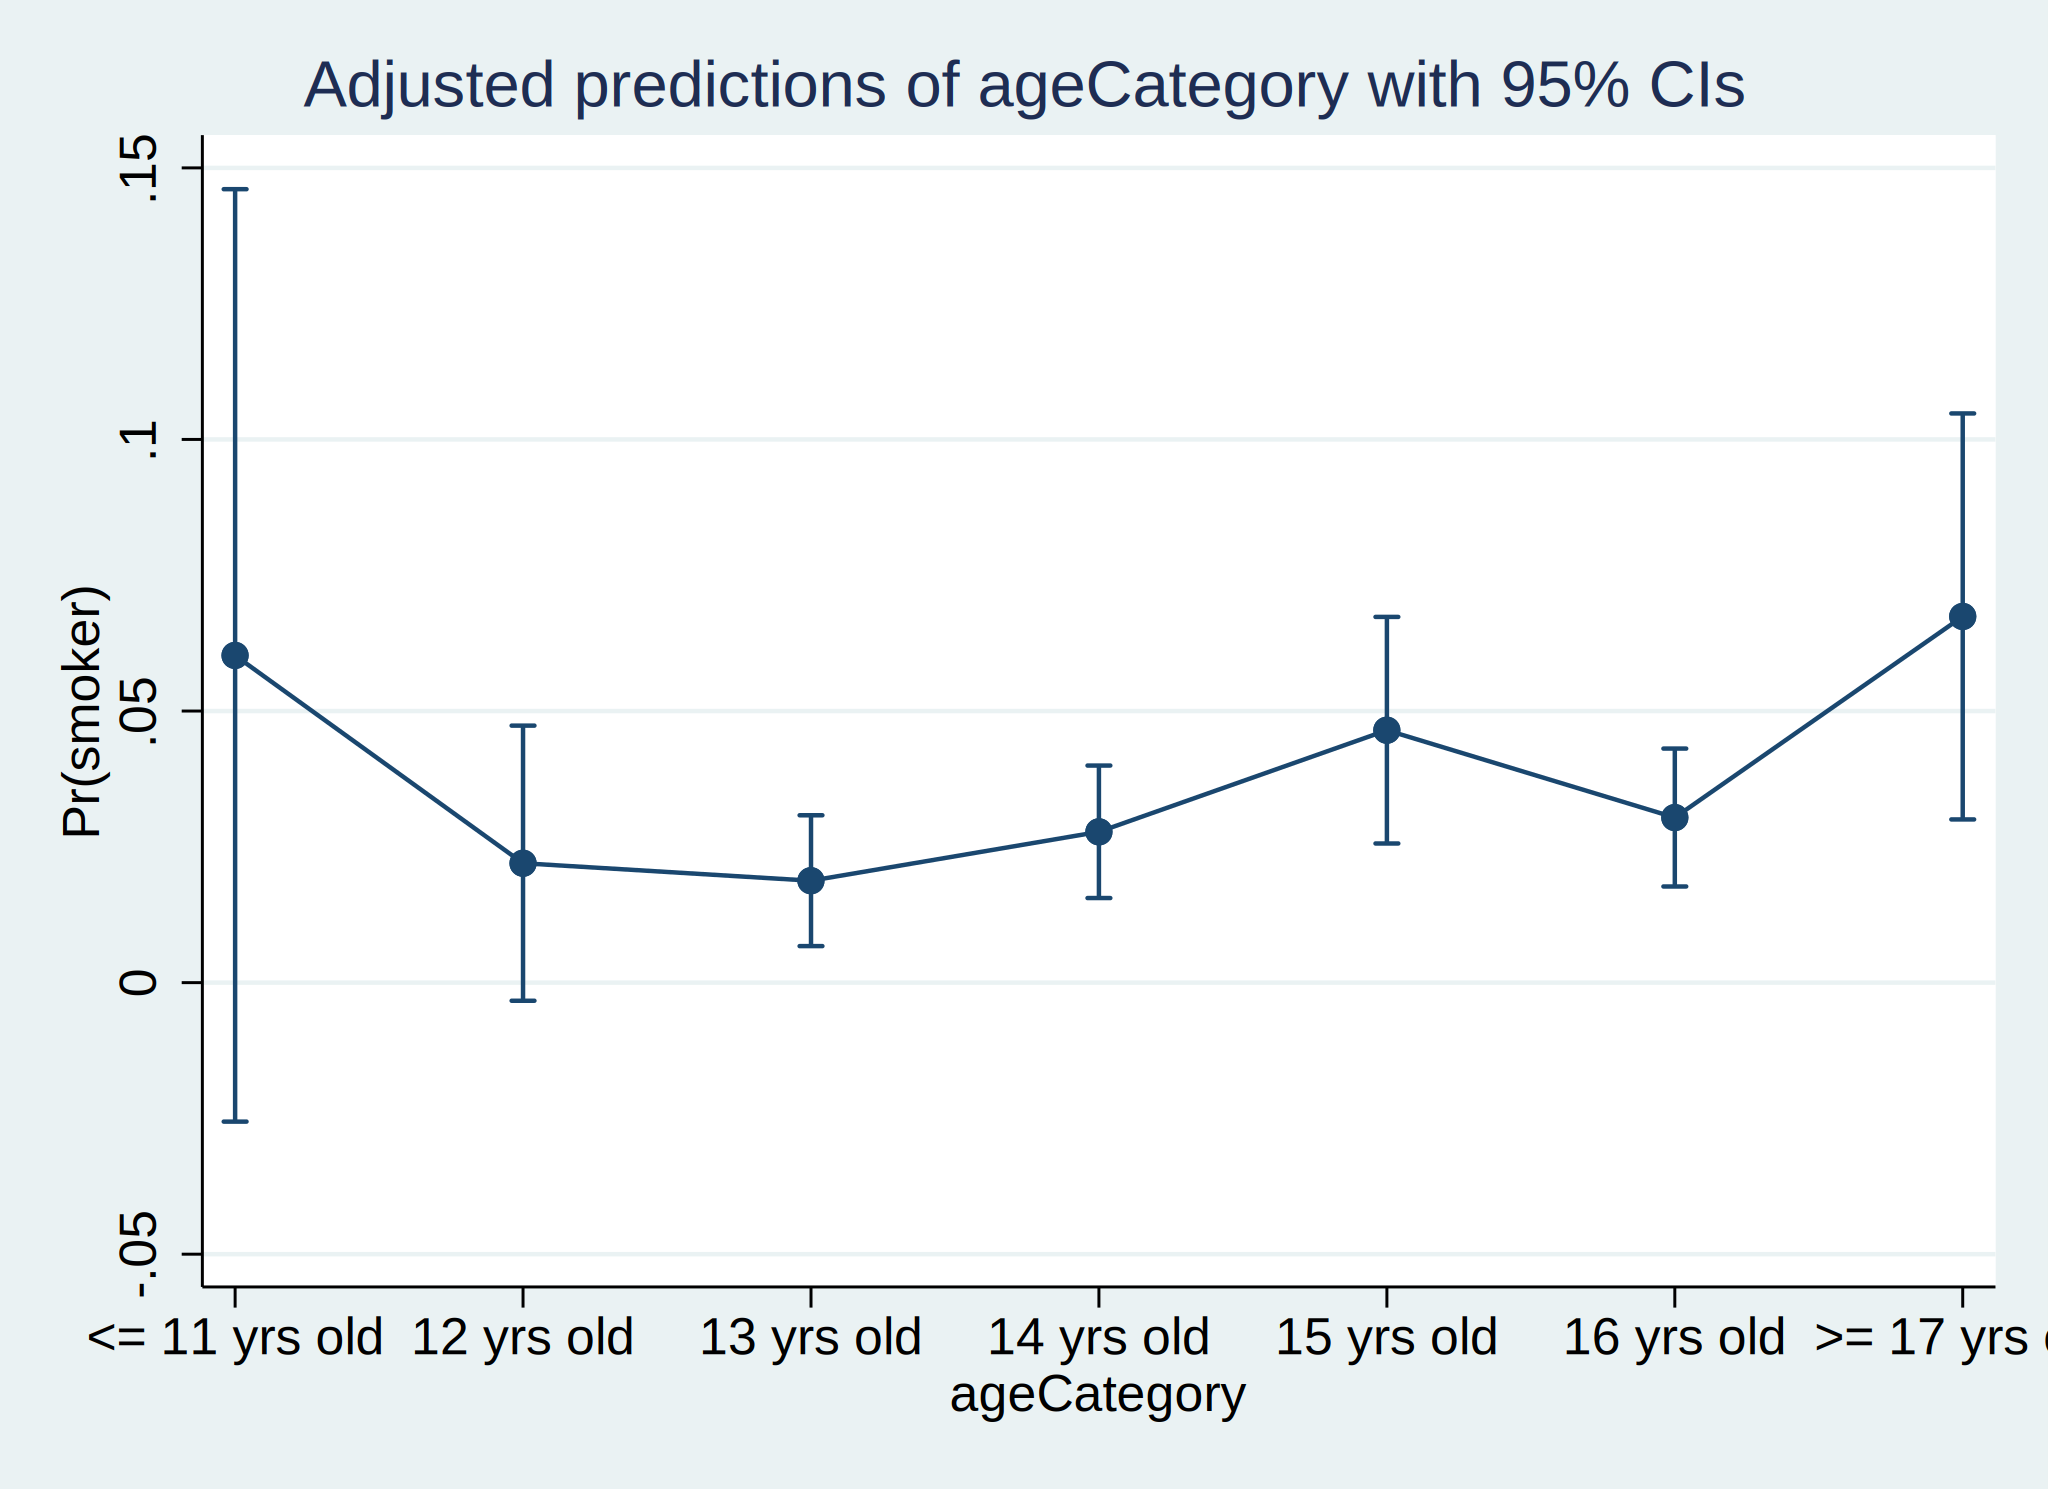

In [20]:
%%stata
margins i.ageCategory, atmeans
marginsplot

In [21]:
%%capture
%%stata
log close
clear